# Team Black Jack

**Group Member: Jiayin Shen, Aria Wang, Erin Yang, Iris Yang**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import warnings
warnings.filterwarnings("ignore")

# Background Information

We chose the dataset called 'Avocado Prices' from Kaggle. We were interested in this dataset because avocado is getting more and more popular in the United States, the health benefits of avocado promoted by food manufacturers and their unique tastes and textures attract more families to purchase avocados on a regular basis. At the same time, the price of avocado is known for its random fluctuation since the production is largely determined by weather, which is hard to predict and be controlled. As avocado lovers, we found it interesting to investigate and analyze the price changes of avocado in the recent years to see whether people's purchasing behaviors adjust with prices.
   
Before explaining this dataset in details, we would like to first give some basic information about avocado so that those who were not familiar with avocado could have a basic understanding of why people like it so much! Avocado is the fruit of avocado trees. They are green-skinned, pear shaped, egg-shaped or spherical. Avocados are cultivated in tropical and Mediterranean climates. Mexico is the world's largest avocado growing country, while in the U.S., 95% of its avocado production is located in Southern California, therefore, avocado also becomes the official fruit of California. In terms of culinary uses, avocado is mostly used for salads or dips. It is popular in vegetarian cuisine. Guacamole, avocado toasts, and avocado milkshake are popular cuisines derived from this magic fruit. As people pay more attention to healthy eating habits, avocado becomes a chic choice for its numerous health benefits, such as the abundance of a variety of vitamins, heart-healthy monounsaturated fatty acids, fiber, antioxidants that protect eyes, and prevention of cancer and heart diseases. 
   	
There are many researches done about avocados’ health benefits, nevertheless, the prices of avocado should also brings people’s attention from an economic perspective. According to a CNN report in 2017, the wholesale price of avocado rose 125% since the beginning of the year, and the average sales price for an avocado was up to $1.17 over the first half of this year. Two key drivers behind the price surge were the weak harvest and insatiable for avocados. In California, the major state producing avocados in the United States, the harvest went down approximately 50 percent compared with the previous year. The fluctuations of the price of avocado were largely due to the nature and environment of their growth, the determinants of supply and demand. Excessive heat, drought, fire and heavy rains happened in Mexico and California in recent years all significantly reduced the supply of avocado. Trade also impacts the price of avocados. As Trump Administration renegotiated the trade deals with Mexico, importing avocados might incur higher tariffs, which would not only raise the product price for suppliers but also increase the cost for consumers. Furthermore, seasonal restrictions in the trade deals would impact the supply and demand, and ultimately raised avocado prices. 
   	
This data came from the Hass Avocado Board website in May, 2018.  It represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on accrual retail sales of Hass avocados. It has approximately 18,250 data entries, and 13 variables. 
- Date:  The date of the observation. This dataset contains data from January 3rd, 2015 to March 14th, 2018.
- Average Price: the average price of  a single avocado
- Total Volume: the total amount of avocados sold on that day in the specific region  
- 4046: total number of avocados with PLU 4046 sold. 4046 represents small/medium Hass avocado (~3-5 oz avocado)
- 4225: total number of avocados with PLU 4225 sold. 4245 represents large Hass avocado (~8-10 oz avocado)
- 4775: total number of avocados with PLU 4775 sold. 4775 represents extra-large Hass avocado (~10-15 oz avocado) 
- Total Bags: the total number of bags of avocado sold on the day in the specific region
- Small Bags: the number of small bags of avocado sold on the day in the specific region
- Large Bags: the number of large bags of avocado sold on the day in the specific region
- XLarge Bags: the number of extra large bags of avocado sold on the day in the specific region
- Type: this is a categorical variable. It has two levels: conventional and organic. 
- Year: the year which the data describes. 
- Region: the city or region of the observation. It is also a categorical variable with 54 levels. That means there are 54 regions/cities in the United States 
	
A Nutrition Research program was established by the Hass Avocado Board. Some of recent researches about conducted on behalf of the Hass Avocado Board explore more beneficial effects of avocado. Wang, Bordi, Fleming, et.al have done a research on overweight and obese adults to determine the effect of avocados on fat diet. They reach a conclusion that consuming one avocado per day is helpful on cardio-metabolic risk factors and it has beneficial effects on people’s heart-healthy fatty acid profile. Kopec, Cooperstone, Schweiggert, et. al have done a research named “Provitamin A carotenoid absorption and conversion from a novel high β-carotene tomato and from carrot is enhanced with fresh Hass Avocado.” The study presents that consuming provitamin A carotenoid with avocado has beneficial effect on people’s carotenoid absorption, and highlights that consuming provitamin A carotenoids in the meal is important to human.

Reference:
- Wang L, Bordi P, Fleming J, Hill, Kris- Etherton P. ‘The effect of a moderate fat diet with and without avocados on lipoprotein particle number, size and subclasses in overweight and obese adults - a randomized, controlled trail. J Am Heart Assoc. 2015 Jan 7; 4(1).
- Kopec RE, Cooperstone JL, Schweiggert RM, et. Al. ‘Provitamin A carotenoid absorption and conversion from a novel high β-carotene tomato and from carrot is enhanced with fresh Hass Avocado. J Nutr. 2014


# Exploratory Analysis of the Data

In [2]:
avocado = pd.read_csv('avocado.csv')

In [3]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Drop the 'Unnamed: 0' column
avocado = avocado.drop('Unnamed: 0', axis= 1)

In [5]:
avocado['Date'] = pd.to_datetime(avocado['Date'])

In [6]:
# There is no missing value in the data
avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [9]:
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


There are two categorical variables in this dataset, so it is helpful to know the levels within each of them.

In [10]:
avocado.type.unique()

array(['conventional', 'organic'], dtype=object)

In [11]:
avocado.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### Average Price

[Text(0,0.5,'Relative Frequency'),
 Text(0.5,0,'Average Price'),
 Text(0.5,1,'Distribution of Average Price')]

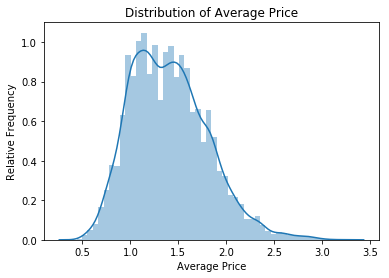

In [12]:
ax = sns.distplot(avocado['AveragePrice'])
ax.set(xlabel='Average Price', ylabel='Relative Frequency', title='Distribution of Average Price')

The distribution of the average price for avocados is unimodal and slightly right-skewed. The average price generally fell between 1.0 and 2.0 during 2015-2018 in the U.S.

### Average Price of Organic Avocados vs. Year in Different Regions

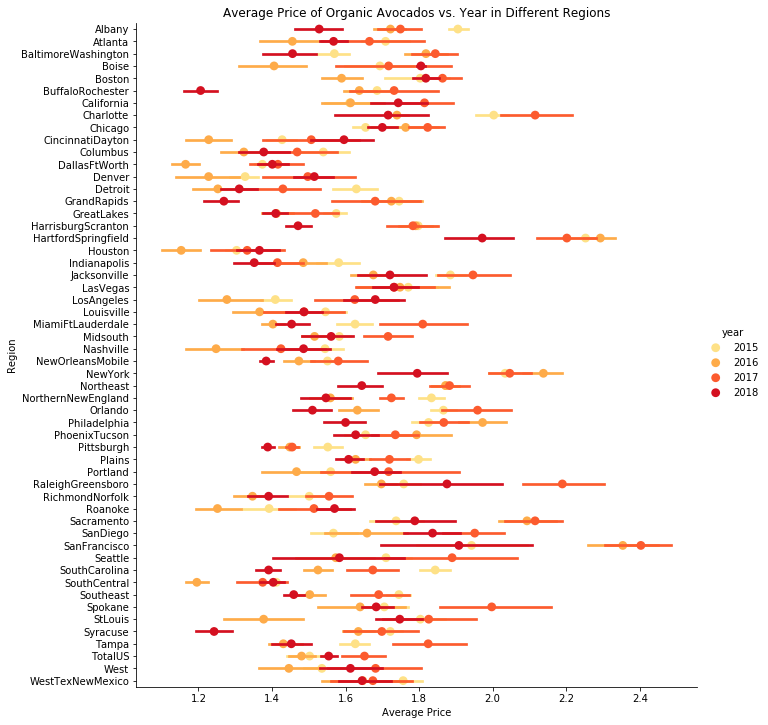

In [13]:
organic = avocado['type']=='organic'
price_year_region = sns.factorplot('AveragePrice','region', data=avocado[organic], 
                                   hue='year', palette='YlOrRd', size=10, join=False)
price_year_region.set(xlabel='Average Price', ylabel='Region', 
                      title='Average Price of Organic Avocados vs. Year in Different Regions')

The plot above shows that in general, organic avocado prices in 2017 is the highest among the prices in these 4 years. Organic avocado prices in San Francisco, Raleigh Greensboro and Hartford Springfield are the highest across the U.S.

### Average Price of Conventional Avocados vs. Year in Different Regions

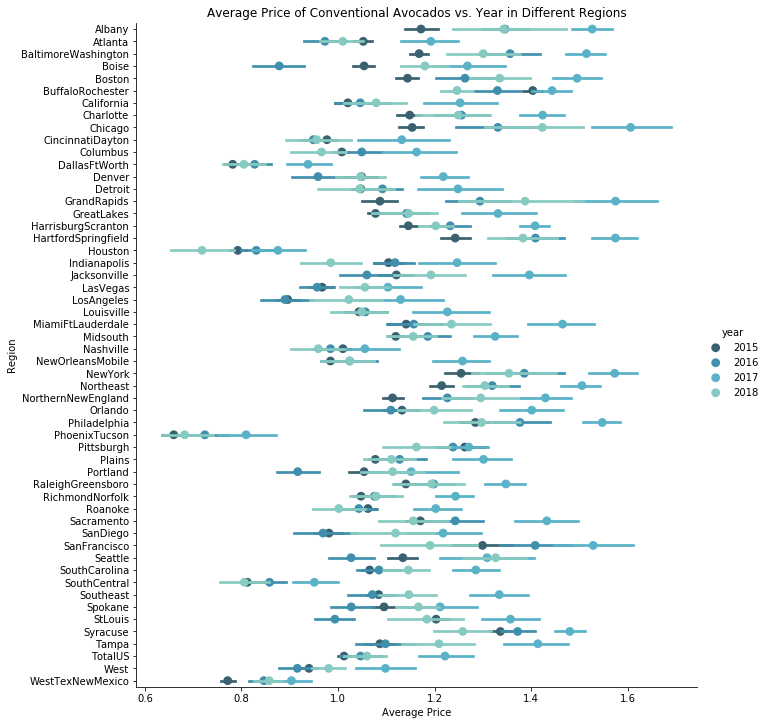

In [14]:
conventional = avocado['type']=='conventional'
price_year_region = sns.factorplot('AveragePrice','region', data=avocado[conventional], 
                                   hue='year', palette='GnBu_d', size=10, join=False)
price_year_region.set(xlabel='Average Price', ylabel='Region', 
                      title='Average Price of Conventional Avocados vs. Year in Different Regions')

Similar to organic avocados, there was also a price peak in 2017 for conventional avocados. Chicago, San Francisco, Grand Rapids, and Hartford Springfield are the highest across the U.S.

### Correlation Matrix

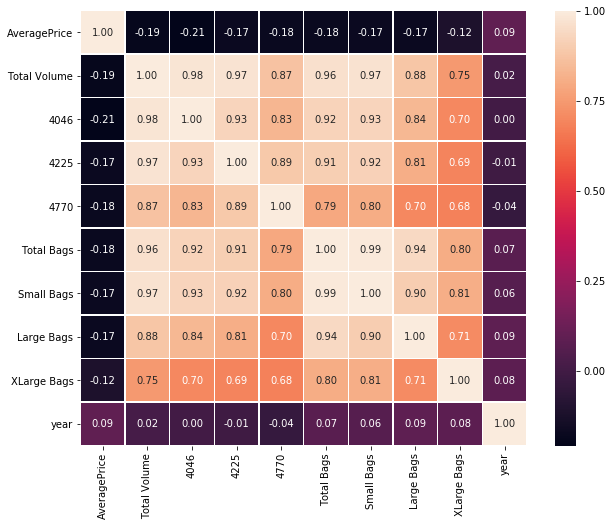

In [15]:
f,axis = plt.subplots(figsize=(10, 8))
sns.heatmap(avocado.corr(), annot=True, linewidths=.4, fmt= '.2f')
plt.show()

As the heatmap above shows, the average price of avocados is not highly correlated with the number of bags, year or volume. Variables related to volume, such as "Total Volume" and 4046, are strongly correlated with the variables related to the number of bags, such as 'Small Bags.'

### Time Plots

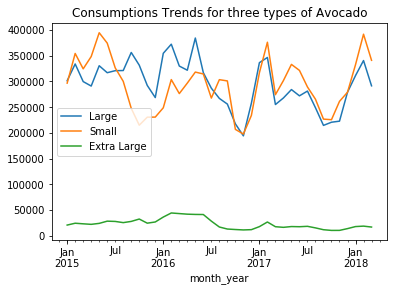

In [16]:
avocado['month_year'] = avocado.Date.dt.to_period('M')
monthly= avocado.groupby('month_year').mean()
monthly['4225'].plot(x = avocado.month_year)
monthly['4046'].plot(x = avocado.month_year)
monthly['4770'].plot(x = avocado.month_year)
plt.title("Consumptions Trends for three types of Avocado")
plt.gca().legend(('Large','Small','Extra Large'))

From the monthly time plot of the consumptions for the three types of avocados, we can tell that the consumption of extra large avocado was the smallest, the quantity was around 25,000, whereas the consumption for small and large avocado were similar and they varied from 250,000 to 400,000. They fluctuated in a similar fashion.

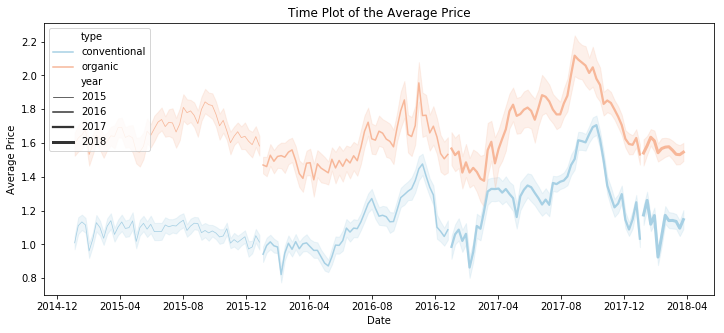

In [17]:
plt.figure(figsize=(12,5))
palette = sns.color_palette("RdBu_r", 2)
price_line = sns.lineplot(x="Date", y="AveragePrice", size='year', data=avocado, hue='type', palette=palette)
price_line.set(ylabel='Average Price', title='Time Plot of the Average Price')
plt.legend(loc='upper left')

The time plot from 2015 to 2018 shows that the price of organic avocados has always been above the price of conventional avocados. Their prices before 2016 were relatively smooth, while the prices after 2016 experienced 2 peaks in November 2016 and November 2017 respectively. After each of these 2 peaks, the prices decreased and reached the bottom.

[Text(0,0.5,'Average Price'), Text(0.5,1,'Time Plot of the Average Price')]

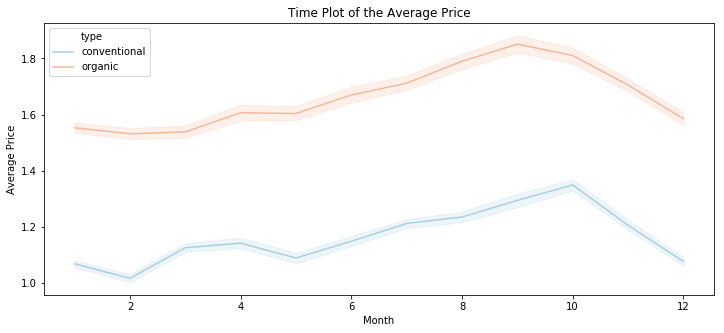

In [18]:
avocado['Month'] = avocado['Date'].map(lambda x: x.month)
plt.figure(figsize=(12,5))
palette = sns.color_palette("RdBu_r", 2)
price_line = sns.lineplot(x="Month", y="AveragePrice", data=avocado, hue='type', palette=palette)
price_line.set(ylabel='Average Price', title='Time Plot of the Average Price')

The monthly time plot above shows that, for each year between 2015 and 2018, the price of organic avocados was the highest in September, while the peak of conventional avocado prices happened later in October. Their prices were both lower at the beginning and end of each year. The price gap between conventional and organic avocados was constant throughout the year.

[Text(0.5,1,'Time Plot of the Total Volume')]

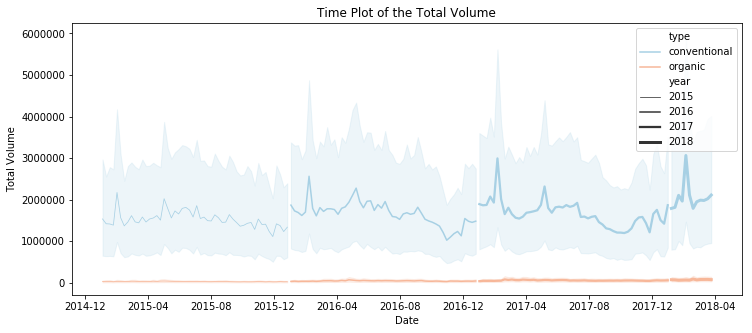

In [19]:
plt.figure(figsize=(12,5))
palette = sns.color_palette('RdBu_r', 2)
price_line = sns.lineplot(x="Date", y="Total Volume", size='year', data=avocado, hue='type', palette=palette)
price_line.set(title='Time Plot of the Total Volume')

The total volume of organic avocados from 2015 to 2018 stayed low and unchanged relative to conventional avocados, so the trend above for organic avocados is not very clear. Let's break down the graph into 2 plots.

[Text(0.5,1,'Time Plot of the Total Volume for Organic Avocados')]

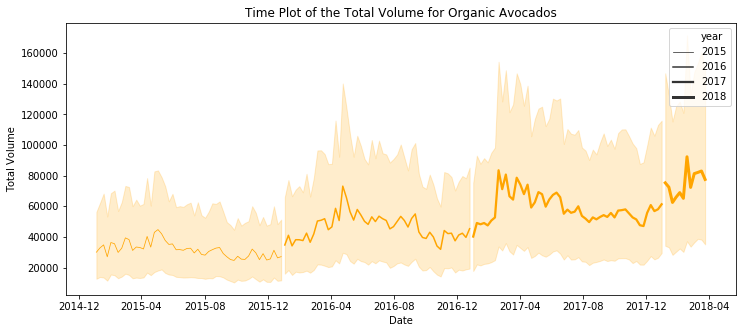

In [20]:
organic_avo = avocado[avocado.type=='organic']
plt.figure(figsize=(12,5))
price_line = sns.lineplot(x="Date", y="Total Volume", size='year', data=organic_avo, color='orange')
price_line.set(title='Time Plot of the Total Volume for Organic Avocados')

We can now see a clearer trend of the total volume of organic avocados over time. From 2015 to 2018, the consumption of organic avocados in the U.S. increased. There were consumption peaks in May 2016, March 2017 and March 2018.

[Text(0.5,1,'Time Plot of the Total Volume for Conventional Avocados')]

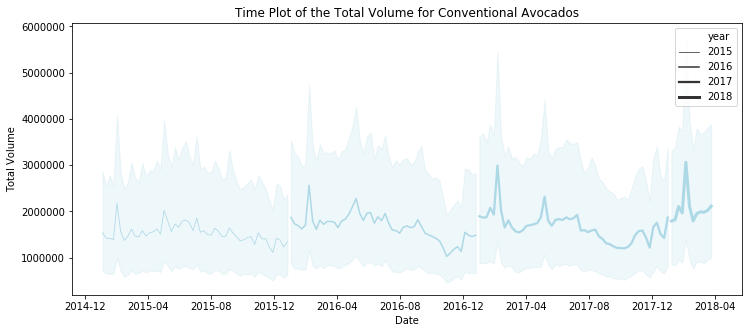

In [21]:
conventional_avo = avocado[avocado.type=='conventional']
plt.figure(figsize=(12,5))
price_line = sns.lineplot(x="Date", y="Total Volume", size='year', data=conventional_avo, color='lightblue')
price_line.set(title='Time Plot of the Total Volume for Conventional Avocados')

From 2015 to 2018, the total consumption volume of conventional avocados slightly increased, but the not as much as the increase of the total volume of organic avocados. The consumption volume for conventional avocados reached the peak at the same time with the consumption volume for organic avocados, around April 2016, March 2017 and January 2018.

[Text(0,0.5,'Average Price'),
 Text(0.5,1,'Time Plot of the Total Volume for Organic Avocados')]

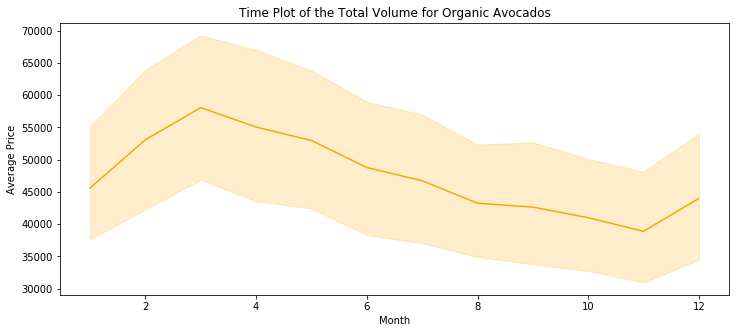

In [22]:
plt.figure(figsize=(12,5))
price_line = sns.lineplot(x="Month", y="Total Volume", data=organic_avo, color='orange')
price_line.set(ylabel='Average Price', title='Time Plot of the Total Volume for Organic Avocados')

For each year between 2015 and 2018, the consumption volume of organic avocados reached the peak in March and the bottom in November.

This is a reasonable and consistent obeservation if we look at "Time Plot of Average Price." The average price was the highest in October and December, while the consumption was relatively low in this time period. While price was relatively low between February and April, the consumption was high. 

[Text(0,0.5,'Average Price'),
 Text(0.5,1,'Time Plot of the Total Volume for Conventional Avocados')]

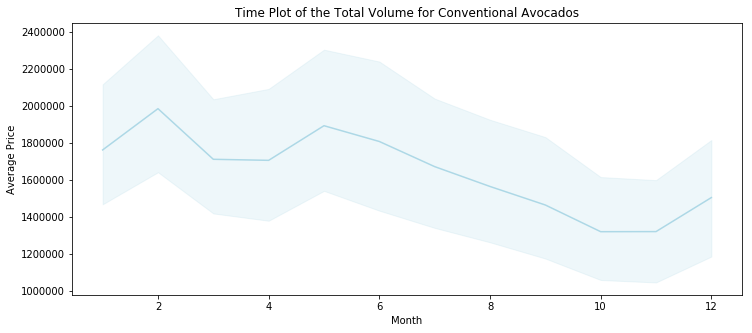

In [23]:
plt.figure(figsize=(12,5))
price_line = sns.lineplot(x="Month", y="Total Volume", data=conventional_avo, color='lightblue')
price_line.set(ylabel='Average Price', title='Time Plot of the Total Volume for Conventional Avocados')

For each year between 2015 and 2018, the consumption volume of conventional avocados fluctutated in the first half of the year, and then decreased to the bottom in November.

### Price Fluctuations in Each Year

In [24]:
year_2015=avocado.loc[avocado['year']==2015]
year_2016=avocado.loc[avocado['year']==2016]
year_2017=avocado.loc[avocado['year']==2017]
year_2018=avocado.loc[avocado['year']==2018]

Text(0.5,1,'Average price of Avocado in 2017')

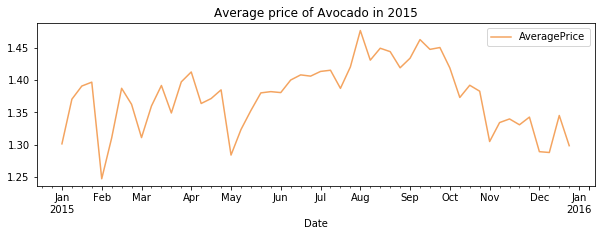

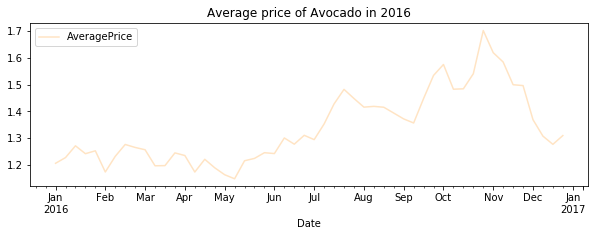

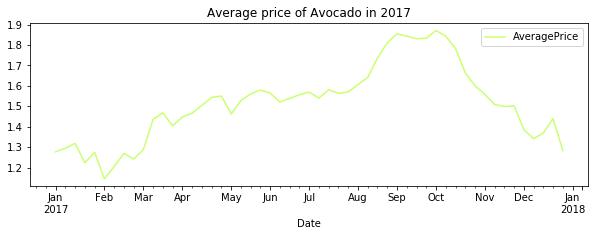

In [25]:
fig1=year_2015.groupby('Date').mean().plot(y='AveragePrice', figsize=(10,3), kind='line', sharex=True, color='#f4a460')
plt.title('Average price of Avocado in 2015')

fig2=year_2016.groupby('Date').mean().plot(y='AveragePrice', figsize=(10,3), kind='line', sharex=True, color='#FFE4C4')
plt.title('Average price of Avocado in 2016')
fig3=year_2017.groupby('Date').mean().plot(y='AveragePrice', figsize=(10,3), kind='line', sharex=True, color='#CAFF70')
plt.title('Average price of Avocado in 2017')

### Price Comparison Between Organic and Conventional Avocados

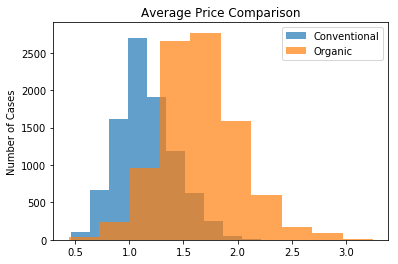

In [26]:
conventional = avocado.loc[avocado['type'] == 'conventional']
organic = avocado.loc[avocado['type'] == 'organic']
plt.hist(conventional['AveragePrice'], alpha = 0.7)
plt.hist(organic['AveragePrice'], alpha = 0.7)
plt.gca().legend(('Conventional','Organic',))
plt.ylabel("Number of Cases")
plt.title("Average Price Comparison")
plt.show()

From the price comparison between organic and conventional avocados, we can tell generally the price of organic avocados was higher than the conventional one. The common value for the conventional avocados was around 1.1, whereas the value for conventional avocados was around 1.6. The range of organic avocados was wider, meaning that its price was more scattered.

### Average Price of Avocado According to Types (Conventional/Organic)

[Text(0,0.5,'Type'),
 Text(0.5,0,'Average Price'),
 Text(0.5,1,'Average Price vs. Avocado Type')]

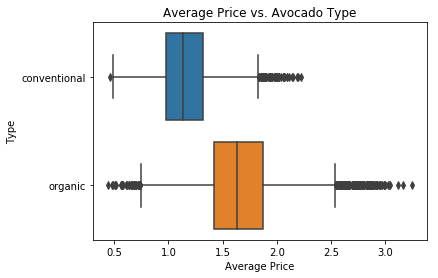

In [27]:
box = sns.boxplot(y="type", x="AveragePrice", data=avocado)
box.set(xlabel='Average Price', ylabel='Type', title='Average Price vs. Avocado Type')

The boxplot above shows that organic avocados were more expensive than conventional avocados. The median price of conventional avocados was around 1.1, which was lower than that of organic avocados. The median price of organic avocados, which was approximately 1.6, was higher than the thrid quantile of the price of conventional avocados. The price of organic avocados had a larger range from 0 to 3.3, while the the price of conventional avocados fell between 0 and 2.3.

### Average of Total Volume According to Region

Text(0.5,1,'Average of Total Volume According to Region')

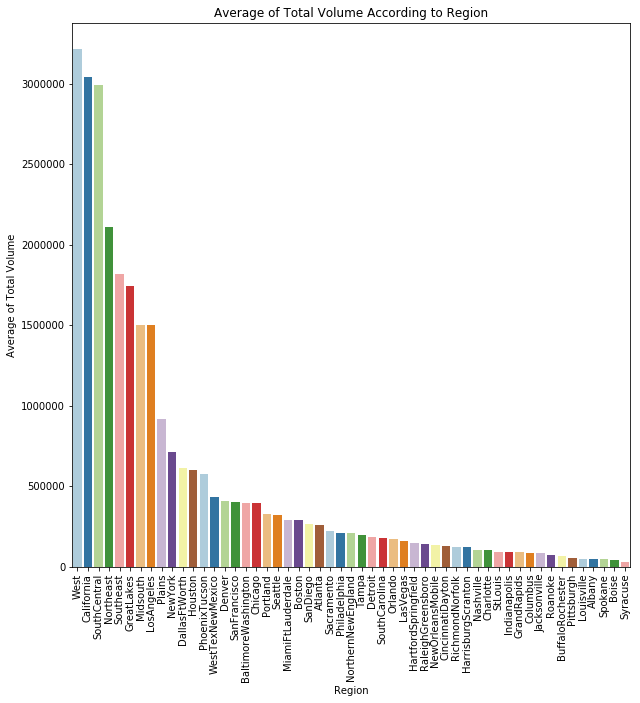

In [28]:
US=avocado.region!='TotalUS'
avocado_US=avocado[US]

region_list=list(avocado_US.region.unique())
average_total_volume=[]

for i in region_list:
    x=avocado_US[avocado_US.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df2=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df2.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df2.reindex(new_index)

plt.figure(figsize=(10,10))
plot2=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume,palette='Paired')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

This barplot shows the average of total volume of avocados sold in each of the U.S. region, ranking the result in descending order. West region had more than 3,000,000 average consumption, which is significantly larger compared with other U.S.regions, such as Northeast, whose average consumption was around 2,100,000. In terms of states, California had the largest volume among all states, approximately 3,050,000 avocados. Los Angeles had the highest avocado consumption among all cities in the U.S. Dallas and Houston, two major cities of Texas, also had more than 500,000 average avocado consumption. 

From this plot, we can conclude that the consumption of avocado was largely determined by region. Since California is the main region producing avocado, cities in the West region consume a significantly larger volume of avocado compared with the east and central regions. 

### Average of Total Volume According to Types (Conventional/Organic)


Text(0.5,1,'Average of Total Volume According to Types')

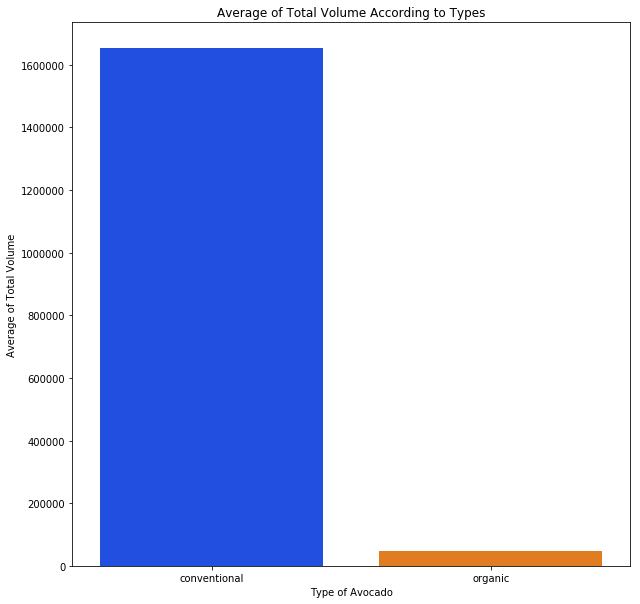

In [29]:
type_list= list(avocado.type.unique())
average_total_volume1=[]

for i in type_list:
    x=avocado[avocado.type==i]
    average_total_volume1.append(sum(x['Total Volume']/len(x)))
df3=pd.DataFrame({'type_list':type_list,'average_total_volume1':average_total_volume1})

plt.figure(figsize=(10,10))
plot3=sns.barplot(x=df3.type_list,y=df3.average_total_volume1, palette='bright')
plt.xlabel('Type of Avocado')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Types')

From this barplot, we can tell that there was a strike discrepancy between consumption of conventional and organic avocados. The possible reason for this observation may be that most avocados were not produced organically, and since its health benefits were emphasized a lot already, consumers did not care too much about whether or not the avocado was organic.  

In [30]:
avocado_average_price= avocado['AveragePrice'].head()
avocado_total_volume= avocado['Total Volume'].head()
pd.concat([avocado_average_price, avocado_total_volume],axis=1)

,AveragePrice,Total Volume
0,1.33,64236.62
1,1.35,54876.98
2,0.93,118220.22
3,1.08,78992.15
4,1.28,51039.60


This table shows the frequency of the avocado price. We saw that when the average price was around $1 per avocado, consumers consumed it the most. And there was a moderate negative relationship between average price and total volume: as average price increased, the total volume of consumption would decrease.

### Different bags sold in each year

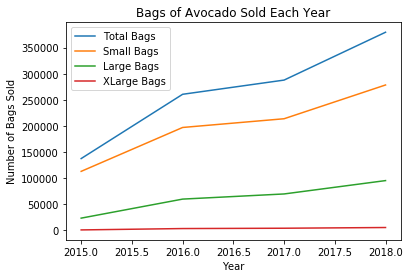

In [31]:
group_year = avocado.groupby('year')
group_year_sub = group_year[['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
group_year_sub.mean().plot()
plt.title('Bags of Avocado Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Bags Sold')
plt.show()

According to the plot, we saw that as data is grouped by year, the consumption of small bags of avocado was obviously much larger than both large bags and extra large bags. Large bags of avocado was also consumed much more than the extra large bags. Extra large bags of avocado had really small number of consumption. People most often bought small bags of avocados, and rarely extra large bags of avocados. There was also an obvious increase in the consumption of avocado as time went. There was an increase every year, especially from 2016 and 2018. 2017 rather had a lower increase in the consumption of avocado. 

### Bags Sold in the All Cities

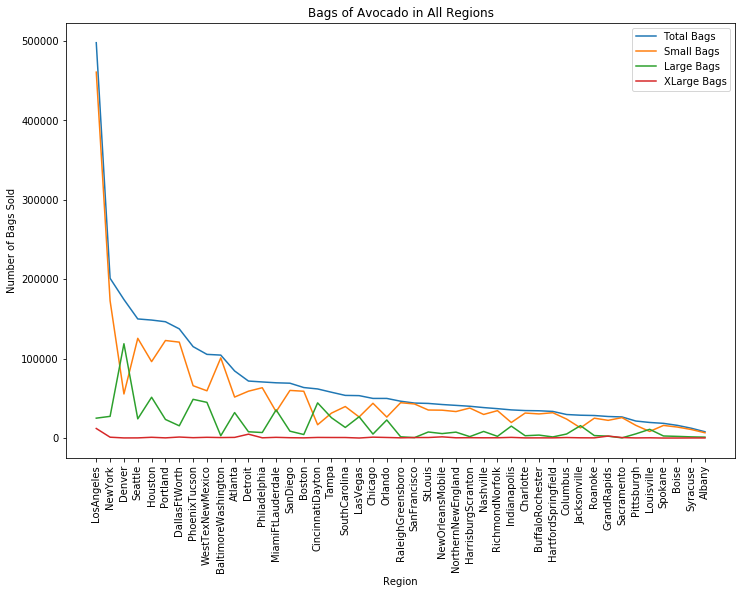

In [32]:
plt.figure(figsize=(12,8))
group_region = avocado.groupby('region')
group_region_sub = group_region[['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
sort_mean = group_region_sub.mean().drop(['West', 'California', 'SouthCentral', 'GreatLakes', 'Northeast', 'Midsouth', 'Southeast', 'Plains', 'TotalUS']).sort_values('Total Bags', ascending=False)
#plt.plot(sort_mean)
plt.plot(sort_mean[['Total Bags']], label = 'Total Bags')
plt.plot(sort_mean[['Small Bags']], label = 'Small Bags')
plt.plot(sort_mean[['Large Bags']], label = 'Large Bags')
plt.plot(sort_mean[['XLarge Bags']], label = 'XLarge Bags')
plt.xticks(rotation=90)
plt.title('Bags of Avocado in All Regions')
plt.xlabel('Region')
plt.ylabel('Number of Bags Sold')
plt.legend(loc='upper right')
plt.show()

The avocado data was grouped by cities. All the large regions ('West', 'California', 'SouthCentral', 'GreatLakes', 'Northeast', 'Midsouth', 'Southeast', 'Plains', and 'TotalUS') were taken out, so only cities in the US were left. Data on Total Bags, Small Bags, Large Bags, and Extra Large Bags were then extracted. The plot shows that the a few cities consumed much more than the other, from the table above we see that some of these cities are Los Angeles, New York, Denver, Seattle, Houston, and Seattle. Also, Los Angeles consumed most of its avocado in small bags, occupying a large percent of its total bags consumed. The plot also shows that number of small bags sold and number of large bags sold in each cities have the opposite shape, suggesting that they were inversely related.

### Average Price In Different Years

In [33]:
group_AP = avocado.groupby('year')
group_AP_sub = group_year[['AveragePrice']].mean()
group_AP_sub

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


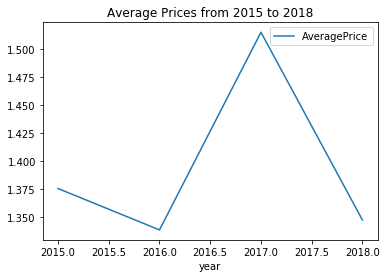

In [34]:
group_AP_sub.plot.line(title='Average Prices from 2015 to 2018')

The table above shows the average prices per year from 2015 to 2018. We see an significant increase in 2017, where the price increased from 1.39 in 2016 to 1.52 in 2017. The price in 2018 then dropped down to 1.35, which is about the same price as the average price in 2015 and 2016. This will be demonstrated in a following line plot, in which we can tell that there was a sharp increase in the avocado price in 2017.

# Data Modeling

In [35]:
dummy = pd.get_dummies(avocado.type)
avocado.append(dummy.iloc[:,0])
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month_year,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11,11


In [36]:
# Turn the variable 'type' into a dummy variable
dummy = pd.get_dummies(avocado.type)
conventional = pd.DataFrame(dummy.iloc[:,0])
data1 = pd.concat([avocado, conventional], axis=1)

y = data1.AveragePrice
x = data1.drop(['AveragePrice', 'month_year', 'Date','type','region'],1)
model = smf.ols('y ~ x', data = avocado).fit().summary()

In [37]:
print(model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     1294.
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:53:14   Log-Likelihood:                -4030.2
No. Observations:               18249   AIC:                             8084.
Df Residuals:                   18237   BIC:                             8178.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -109.2489      4.992    -21.886      0.0

### Predictions

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

/Users/xiaohanwang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
avocado_df = avocado.copy()
X = avocado_df.drop('AveragePrice',1)
y = avocado_df.AveragePrice
X = X[:-1].reset_index(drop=True)
y = y[1:].reset_index(drop=True)

avocado_df = pd.concat([X,y], 1)
avocado_df = avocado_df.groupby('Date').mean()

avocado_df.dtypes

Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
Month             int64
AveragePrice    float64
dtype: object

In [40]:
X = avocado_df.drop('AveragePrice',1)
y = avocado_df.AveragePrice
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [41]:
classifiers = [['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor()],
               ['KNeighbours :', KNeighborsRegressor(n_neighbors = 3)]]

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

DecisionTree : 0.21472131236500216
RandomForest : 0.18482297597978462
KNeighbours : 0.17797698774000326


The numbers above shows that KNN has the lowest prediciton error in the test dataset, so it would be the best predicion method among these 3 methods. 

# KNN for Average Price Prediction

In [42]:
avocado = pd.read_csv("avocado.csv")
avocado = avocado.drop(['Unnamed: 0', 'Date'], axis = 1)

In [43]:
X = avocado.drop(['AveragePrice'], axis = 1).values
y = avocado['AveragePrice'].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 8] = labelencoder_X_1.fit_transform(X[:, 9])
labelencoder_X_2 = LabelEncoder()
X[:, 9] = labelencoder_X_2.fit_transform(X[:, 10])
labelencoder_X_3 = LabelEncoder()
X[:, 10] = labelencoder_X_3.fit_transform(X[:, 10])
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,64236.6,1036.74,54454.8,48.16,8696.87,8603.62,93.25,0,0,0,0
1,54877,674.28,44638.8,58.33,9505.56,9408.07,97.49,0,0,0,0
2,118220,794.7,109150,130.5,8145.35,8042.21,103.14,0,0,0,0
3,78992.1,1132,71976.4,72.58,5811.16,5677.4,133.76,0,0,0,0
4,51039.6,941.48,43838.4,75.78,6183.95,5986.26,197.69,0,0,0,0


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(avocado.drop(['AveragePrice', 'type', 'year', 'region'],axis=1))
scaled_features = scaler.transform(avocado.drop(['AveragePrice', 'type', 'year', 'region'],axis=1))
df_feat = pd.DataFrame(scaled_features,columns=avocado.columns[1:9])
df_feat.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558


In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

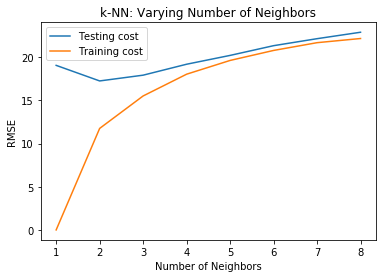

In [48]:
from sklearn.metrics import mean_squared_error
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # predict
    pred_knn_train = knn.predict(X_train)
    pred_knn_test = knn.predict(X_test)
    
    # Compute accuracy on the training set
    train_accuracy[i] = math.sqrt(sum((pred_knn_train - y_train)**2)/12774)

   # Compute accuracy on the testing set
    test_accuracy[i] = math.sqrt(sum((pred_knn_test - y_test)**2)/5475)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing cost')
plt.plot(neighbors, train_accuracy, label = 'Training cost')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.show()

The graph above compares the training cost and testing cost with different choices of k above. As k increases, the training cost keeps increasing. For the testing cost, it goes down from k = 1 to 2, and increases smoothly since k = 2.
We chose our optimal k based on the minimum value of the testing cost. Thus, we ended up choosing k = 2.

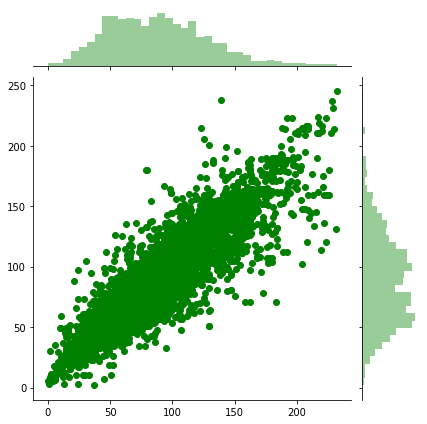

In [49]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
sns.jointplot(x=y_test, y=pred_knn, color= 'g')
plt.show()

The graph shows that the knn model performs faily well. The x axis shows the actual values of the testing data, and y-axis is the predicted value. If our model were 100%, all the dots would lie on the diagonal line of the graph. 
In our graph, the dots follow the general trend of the ideal model, indicating it performs pretty well. Also, the graph display that the distributions of the actual data and the predicted values look pretty similar.

In [50]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv_results)

[0.04235382 0.04957725 0.04482894 0.04356515 0.05246035]


We also implemented cross validation to ensure the consistency of the model performance. We used 5-fold cross validation and the mean squared error for each fold as the test set remains around 0.046. Therefore, we ruled out the possibility that the model happens to perform well just because of the way we split the data.

# Conclusion

From our analysis above, we discovered the following patterns and relationships:
- From 2015 to 2018 in the U.S., the average price of organic avocados was significantly higher than that of conventioinal avocados. 
- The time trends for conventional and organic avocado prices are similar: there were price peaks in November 2016 and November 2017 due to avocado shortage, and the average price in 2018 had dropped to the normal level as in the beginning of 2016. Meanwhile, for each year, avocados were more expensive in the September and October than in the rest of the year.
- Chicago, San Francisco, Grand Rapids, and Hartford Springfield were the regions with the highest price of avocados across the U.S.
- From 2015 to 2018, the consumption of avocado has increased year by year, regardless of the increase in the avocado price. As for the monthly pattern, the consumption reached the peak in the spring, and it fell to the bottom in the fall, when the avocados had the highest price in the year.
- Bags of avocados in a small size were the most popular, compared to the bags in other sizes. The consumption of extra large bags of avocados has remained low. The small and large bags of avocados were the substitute of each other.
- The avocado price had a signifigant relationship with the type of the avocado, but it was not significantly linearly impacted by the consumption quantity, year or avocado size.

Feel free to check out our brief presentation here: https://www.youtube.com/watch?v=81LvCAk9tZA